# 1. Accuracy

In [25]:
# Standard imports 
import pandas as pd
import numpy as np

In [26]:
# Initiating a model
model = pd.read_csv("../data/heart-disease.csv")
model.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Splitting into X & y axes
X=model.drop("target",axis =1)
y=model["target"]
X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [28]:
# Calling classifier model for Model training
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model = RandomForestClassifier(n_estimators=100)

In [47]:
# Calling cross_val_score to make preediction of the model
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(model, X, y, cv = 4)
np.mean(cross_val_score)

0.8480701754385965

# 2. Area under the ROC Curve
#### Area under the Reciever operationg characteristic curve
##### AUC/ROC

#### ROC curves are comparisons of model's true positive versus false positive rate
||Prediction|Truth|
|---|---|---|
|True Positive |1|1
|Flase Positive|1|0|
|True Negative |0|0|
|False Negative|0|1|

In [6]:
# Create test & training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [7]:
# Fitting the classifier model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# making predictions with probabilities
from sklearn.metrics import roc_curve
y_probs = model.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.  , 1.  ],
        [0.44, 0.56],
        [0.78, 0.22],
        [0.28, 0.72],
        [0.95, 0.05],
        [0.9 , 0.1 ],
        [0.91, 0.09],
        [0.53, 0.47],
        [0.04, 0.96],
        [0.23, 0.77]]),
 61)

In [9]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([1.  , 0.56, 0.22, 0.72, 0.05, 0.1 , 0.09, 0.47, 0.96, 0.77])

In [10]:
# Calculating tpr, fpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

#chack false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05263158, 0.05263158, 0.05263158, 0.15789474, 0.15789474,
       0.21052632, 0.21052632, 0.21052632, 0.21052632, 0.26315789,
       0.26315789, 0.31578947, 0.31578947, 0.42105263, 0.42105263,
       0.47368421, 0.63157895, 0.73684211, 1.        ])

### Creating a function for plotting ROC Curve

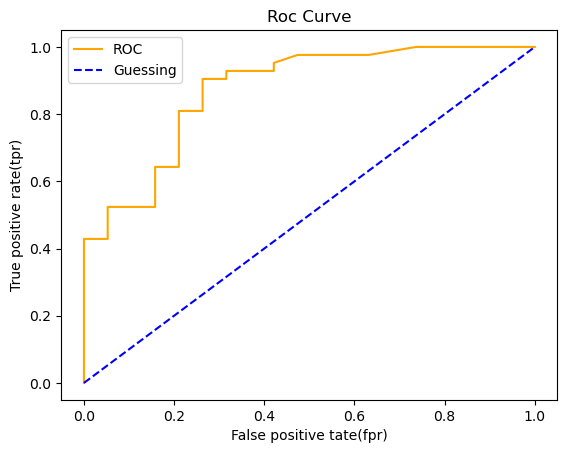

In [11]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color ="orange", label="ROC")
    plt.plot([0,1], [0,1], color ="blue", label="Guessing", linestyle="--")
    plt.xlabel("False positive tate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Roc Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8715538847117795

### Plot perfect roc curve

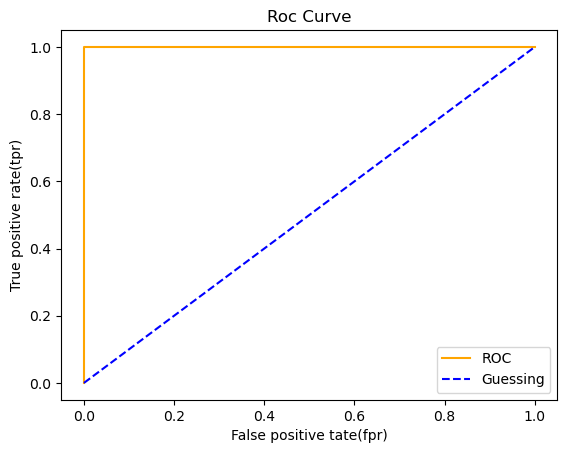

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [14]:
roc_auc_score(y_test, y_test)

1.0

### Confusion matrix

Confusion metrics is a quick way to comapre the labels that a model predicts and the actual label 
it was supposed to predict.
Basically, the idea of where the model gets confused.

In [15]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(X_test)
confusion_matrix(y_test, y_preds)


array([[15,  4],
       [ 8, 34]])

In [16]:
model

RandomForestClassifier()

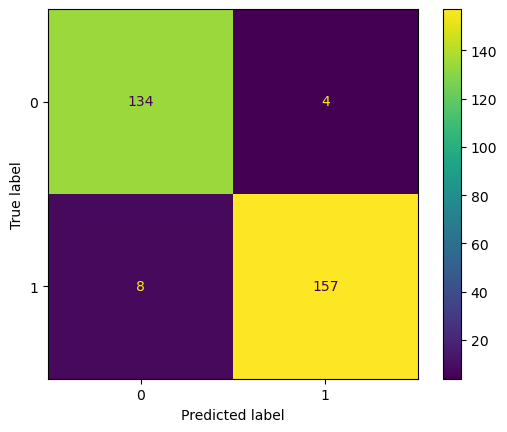

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)

In [18]:
RandomForestClassifier.get_params(model, deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.89      0.81      0.85        42

    accuracy                           0.80        61
   macro avg       0.77      0.80      0.78        61
weighted avg       0.82      0.80      0.81        61

